In [121]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [122]:
import torch 
from hubconf import MiDaS, transforms
from midas.midas_net import MidasNet

In [228]:
import cv2
import torch
import urllib.request
import matplotlib.pyplot as plt
plt.rcParams["image.cmap"] = 'plasma' 

In [124]:
model = MiDaS()
transform = transforms().default_transform

Loading weights:  None


Using cache found in /root/.cache/torch/hub/facebookresearch_WSL-Images_main


In [185]:
from src.datasets.apollo_scape import ApolloScape

In [186]:
dataset = ApolloScape(remote=True, username='jellouli')

Remote server password: ········


In [189]:
def predict(img):
    input_batch = transform(img)    
    with torch.no_grad():
        prediction = model(input_batch)
        prediction = torch.nn.functional.interpolate(
            prediction.unsqueeze(1),
            size=img.shape[:2],
            mode="bicubic",
            align_corners=False,
        ).squeeze()
        output = prediction.cpu().numpy()
        return output

In [232]:
img, disp = next(iter(dataset))

In [235]:
ls notebooks 

180114_025837987_Camera_5.jpg  dog.jpg
180114_025837987_Camera_5.png  test_fine_tuning.ipynb


In [255]:
cv2.imread('notebooks/180114_025837987_Camera_5.png', cv2.IMREAD_GRAYSCALE).shape

(960, 3130)

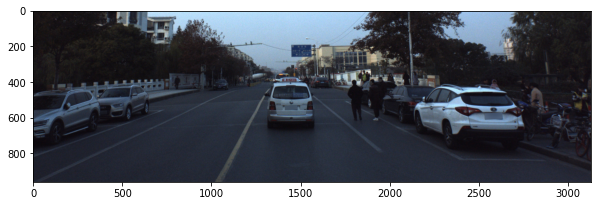

In [233]:
plt.figure(figsize=(10,15))
plt.imshow(img)
plt.show()

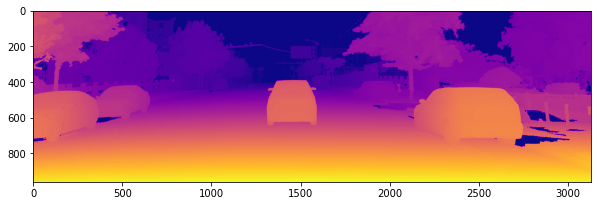

In [234]:
plt.figure(figsize=(10,15))
plt.imshow(disp.mean(axis=2), cmap='plasma')
plt.show()

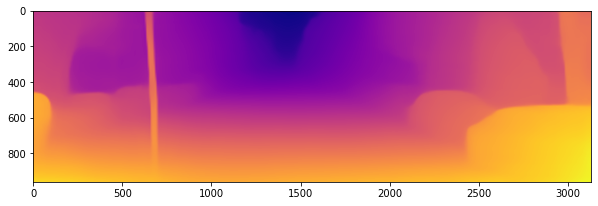

In [231]:
plt.figure(figsize=(10,15))
plt.imshow(predict(img))
plt.show()